## Analysis of the Energy through the System

Given that we want to develop our analysis in the most stable structure one can get, then its important to get rid of all the noise that the system inherently might have, for instance, given the pressure and temperature of it. So, for this, our approach is simple yet effective:
 - Find the stationary time $t_s$
 - Compute an average of the structure through this stationary time ($t_s, t_f$)

This would then yield in a hopefully stable structure which "removes" or smoothes the internal fluctuations.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 25 ns data
# ene_file = "/Users/alejandro/Desktop/mddocs/processing-analysis/fullcol-0308/results-0808"

# 100 ns data
ene_file = "/Users/alejandro/Desktop/mddocs/processing-analysis/fullcol-100ns-2008"

# Line to unpack .xvg generated by GROMACS
t_e, ene = np.loadtxt(ene_file + "/energy.xvg",comments=["@","#"],unpack=True)

# time in ns
t_e = t_e/1000

In [84]:
# "Accumulated" Mean
n_data = len(ene)
ene_acummean = np.zeros(n_data)

for i in range(n_data):
    ene_acummean[i] = np.mean(ene[0:i+1])

# Compute mean through timescales
ts = 2.5 #ns
n_m = int(t_e[-1]/ts)
stp_nm = int((len(t_e)-1)/n_m)
ene_mean = np.zeros(n_m + 1)
t_rep = np.zeros(n_m + 1)

ene_mean[0], t_rep[0] = ene[0], t_e[0]

for i in range(n_m):
    ene_mean[i+1] = np.mean(ene[stp_nm*i:stp_nm*(i+1)])
    t_rep[i+1] = np.mean(t_e[stp_nm*i:stp_nm*(i+1)])

In [85]:
# Translation to fit
min_e = min(ene_mean)
e_0 = min_e + 1e-4*min_e

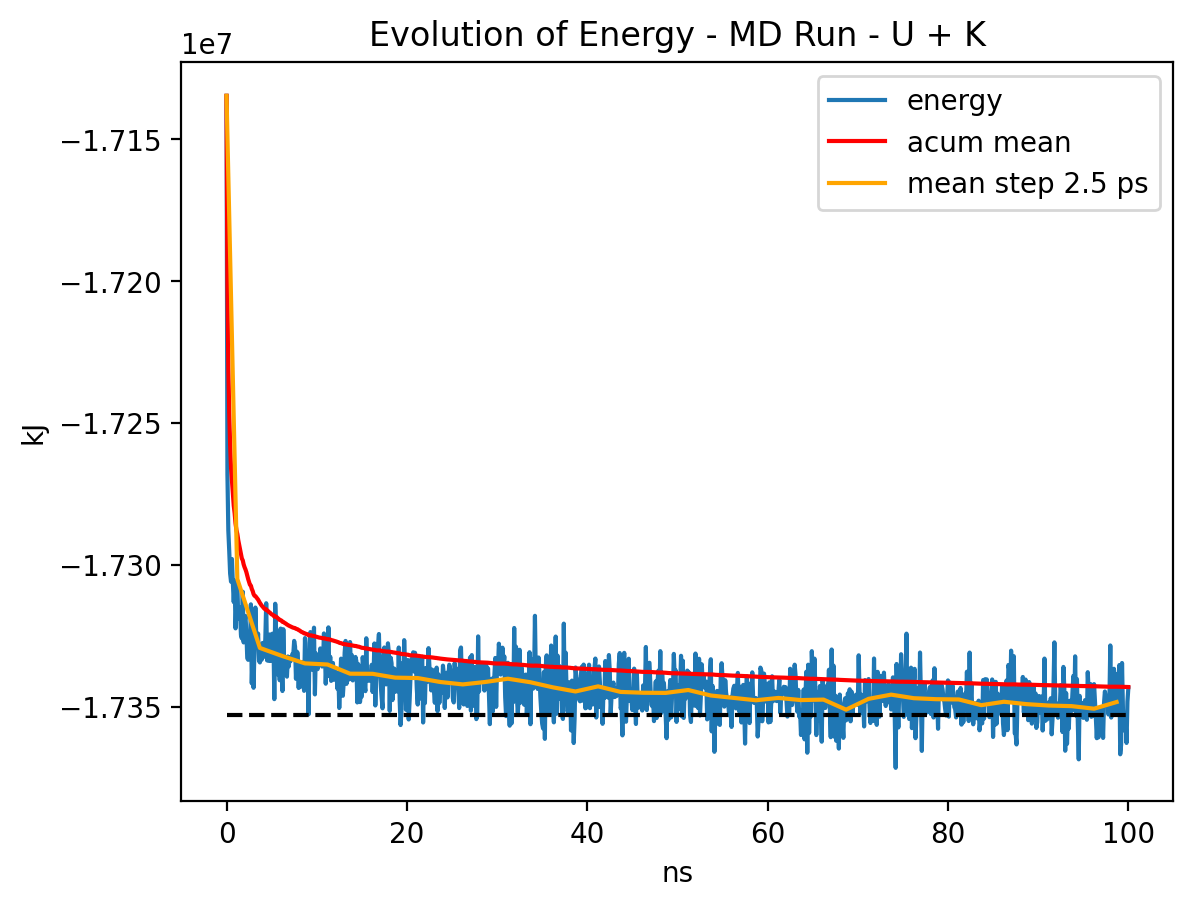

In [86]:
plt.figure(dpi=200)

# -- Energy and Mean --
plt.plot(t_e, ene, label="energy")

# Acum Mean
plt.plot(t_e, ene_acummean, label="acum mean", color="r")

# "Bin" Mean
plt.plot(t_rep, ene_mean, label=f"mean step {ts} ps", color='orange')
# plt.scatter(t_rep, ene_mean, color='r', alpha=0.5, zorder=3)

# Proposed E_0 (translation)
plt.hlines(e_0, 0, 100, linestyle='dashed', color='k')

plt.ylabel("kJ")
plt.xlabel("ns")
plt.title("Evolution of Energy - MD Run - U + K")
plt.legend()
plt.show()

For $y = \lambda a^{\gamma x}$, **semilog** does:

$$
\log_a(y) = \gamma x + \log_a(\lambda)
$$

Which gives a line, for the base $a$, commonly $10$ or $e$

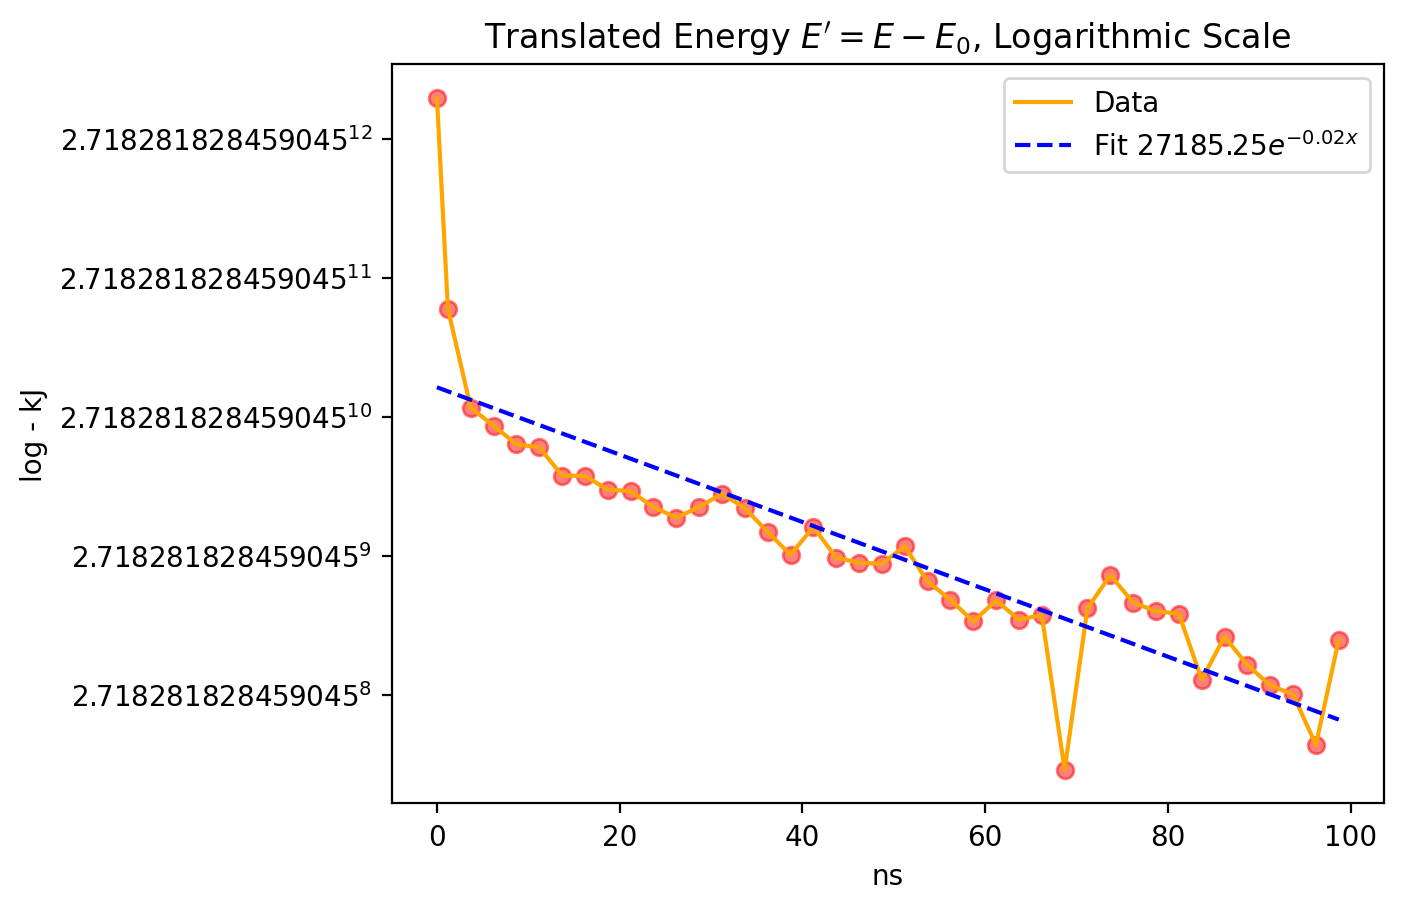

In [87]:
# translation and logarithmic scale
ene_mean_p = ene_mean - e_0

plt.figure(dpi=200)

plt.semilogy(t_rep, ene_mean_p, color='orange', base=np.e, label='Data')
plt.scatter(t_rep, ene_mean_p, color='r', alpha=0.5)

# linear fit
log_e = np.log(ene_mean_p)
m, b = np.polyfit(t_rep, log_e, 1)
a_exp = np.exp(b)
ene_fit = a_exp*np.exp(m*t_rep)

plt.plot(t_rep, ene_fit, linestyle='dashed', color='b', label=rf'Fit ${a_exp:.2f}e^{{{m:.2f}x}}$')

plt.ylabel("log - kJ")
plt.xlabel("ns")
plt.title(r"Translated Energy $E' =  E - E_0$, Logarithmic Scale")
plt.legend()
plt.show()

### COM Tracking

We can also track the COM to see that the restrictions of momenta for the COM held, leading to not a net movement of the fibril.

In [ ]:
# Load COM data
t_com, comx, comy, comz = np.loadtxt(ene_file + "/com.xvg",comments=["@","#"],unpack=True)

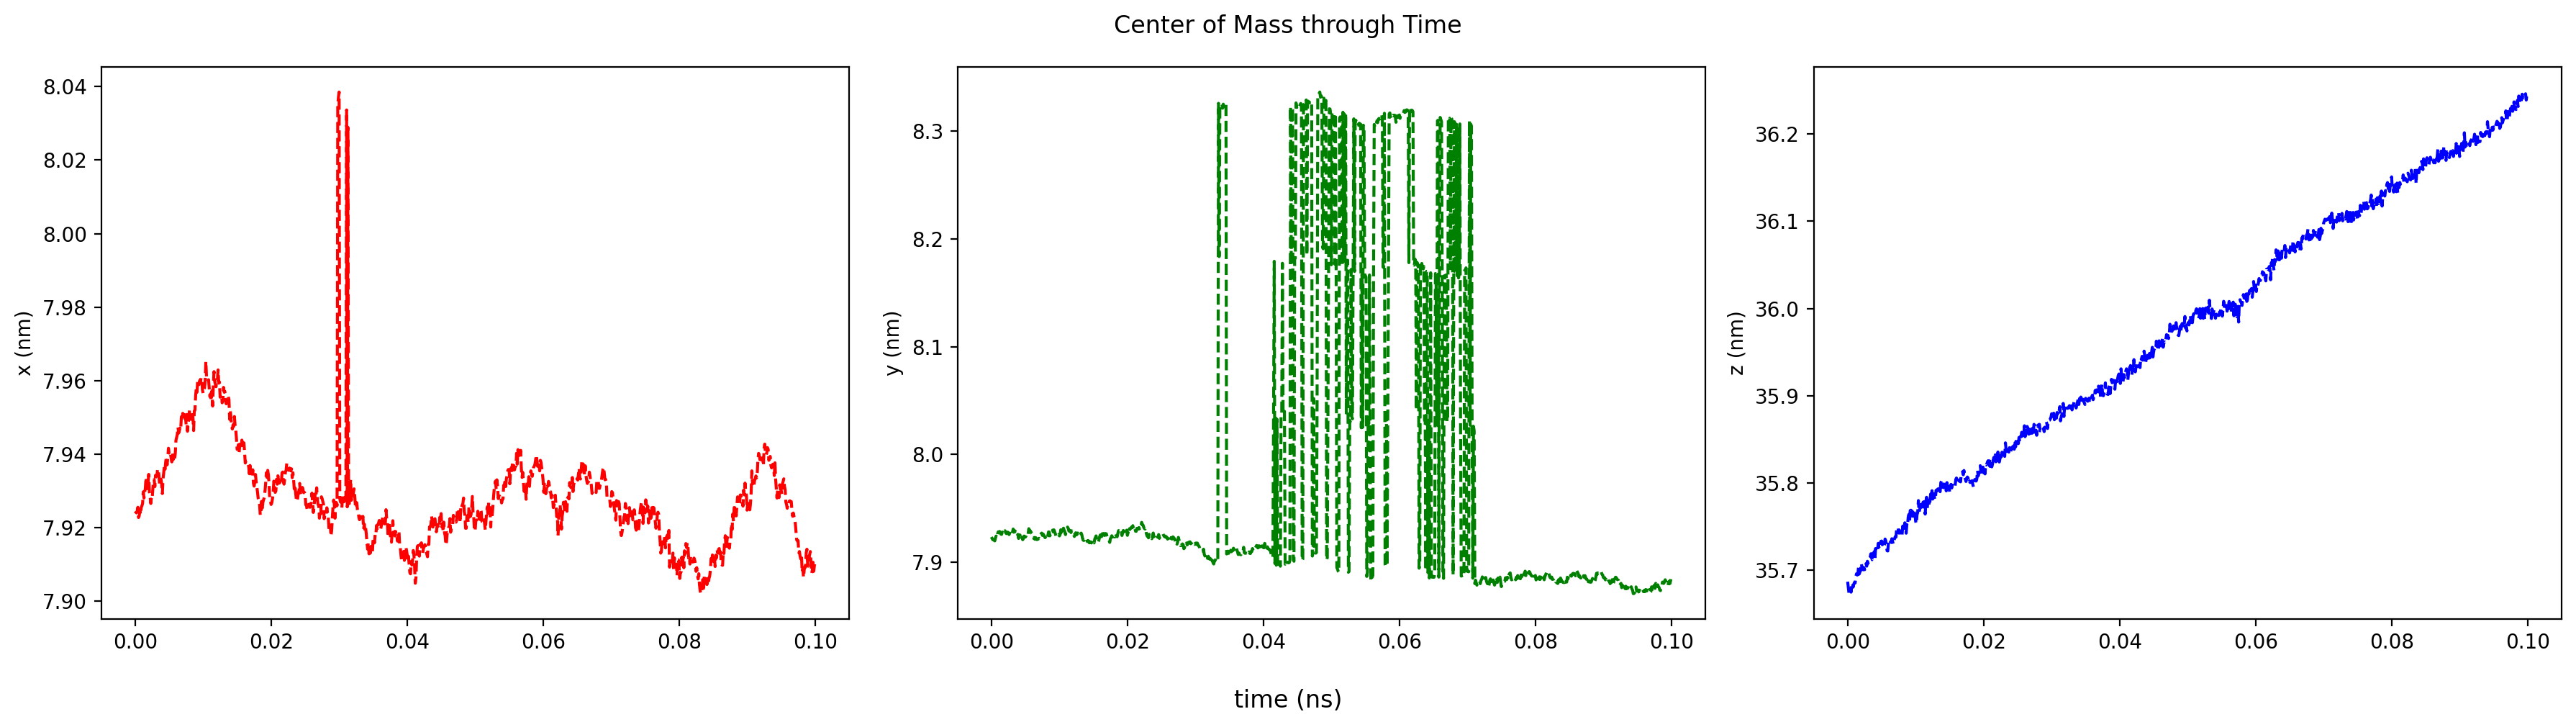

In [15]:
# time in ns
t_com = t_com/1000

fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=200)

axs[0].plot(t_com, comx, color='r', linestyle='dashed')
axs[0].set_ylabel('x (nm)')
axs[1].plot(t_com, comy, color='g', linestyle='dashed')
axs[1].set_ylabel('y (nm)')
axs[2].plot(t_com, comz, color='b', linestyle='dashed')
axs[2].set_ylabel('z (nm)')

fig.supxlabel("time (ns)")
fig.suptitle("Center of Mass through Time")

plt.tight_layout()
plt.show()